In [23]:
import sys
sys.path.append('../../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.io import mmread
from scipy import sparse as sp
import freeqsw as qsw
import h5py


# Introduction:

Exciton transport in the FMO, and other photosythetic complexes has recieved a large amount of attnetion due to them exhibiting measurable inter-site coherences. This is exciting becuase of the possibility that these quantum effects may play a role in the transport efficiency.

The role of quantum coherence in the FMO complex is somewhat contraversial. After the initial idenfication of these effects via 2D spectroscopy at cryogenic temperatures, which lead to the the seminial paper on the topic, later spectrocopic studies indicated that the coherent effects are largely supressed at standard temperature and, where present, may actually be hindering the overall transport time. Quantum Walks based on the Redfiled (?) master equation have been used to study the dynamics of quantum transport in the FMO complex in detailed. It has also been observed that a simplified QSW model results n similar dynamics. 

# Theory

The stucture of the FMO complex is well defined, it being typically modelled as seven chromophers (light aborbing molcules) held with a protine cage. This is depiected in Fiure ??, along with the typically numbering of the chromophore sites. Light energy is typically asorpbed at site 6, before being transpored to a reaction centre via comphore three, where the excitonic energy is converted to chemical energy. 

he quantum significance of this configuration has been considered, for example, wether not not the network is effectively perfoming a 'Gover's search' algorithm. While the answer to that question was shown to be a, rather unexciting, 'no', the significance of the topological configuration of the FMO complex remains an open question.

### Look at what I have previously wrritten specifically pertaining to exciton transport.


In many of these studies the FMO complex is generally modelled as a 7 node network with 7 edges, with the topoogy being derived from the most significant couplings has given by the FMO Hamiltonian. Shown in Figure ?, transport is typically modeled as starting from an exciation at site 6, followed by trapping at site 3. 

It is therefore natural question wether or not there is an inate 'quantumness' to the role this topology plays in energy transport. I propose that a 'quantum topology' would exhibt some, or all of the following effects, drawing from the QSW framework:

* A rate of transport dependant on $\omega$
* A greater than average support of site coherences at a given $\omega$ 

Such a question possess a challenge as the search space for graphs consisting of 7 nodes is exceedingly large, if all configurations ranging from a minimal number of cnnections (a line graph), to a maximum number of connections (a complete graph) are considered. This study thus limits the range of topological consideration to a configurations consisting of 7 nodes and 7 edges. An additional restrinction fixes the distance between the absorption site 6 and the emission site 3 to 4 nodes. These restrictions mean that transport throught these networks may be considered as a function of topology alone. This study thus consists of a 'meta' analysis of this set. 

## Methods

To measure the transport efficency we will intoduce the concept of expected survival time ($\eta$). This is defined as the the amount of time the exciton walker has a probability of existing within the network. For this computational analysis, this time is identified by then point at which chnage in the population of the sink node attached to site 3 is less than ??. By taking this measurement at varying $\omega$, the energy transport effciency may be considered as a function of $\omega$, $\eta(\omega)$.  

The magnitude of quantum effects at a given $\eta(\omega)$ may be quantified by the time normalized integrated coherences,

$\bar{\kappa} = \int_0^\infty \sum_{i \neq j}^k \rho_{ij}(t)$





## Results
Undirected graphs were generated creating the set of all upper triangular matrices with 7 non-zero entires. These were filltered for solutions with an inter-node distance of 4 between nodes 3 and 6 and then filtered again for isomorhic uniqueness using methods for graph analysis provided by mathematica. This resulted in a total sample set of 32 graphs. QSW simulation on these graph topologies was carried out using QSW_MPI. With t1 = 0, t2 = 2000, gamma = 1, q = 2^15 and omega ranging from 0 to 1 in steps of 0.01. For each omega the time integrated populations and coherences were recorded, and the time taken for 'complete' arrival of the walker to the sink node attached to site 6. 'Complete' arrival is defined as being the point at which the sink site reaches a steady population which, based on the validation results shown in Section ??, Figure ??, was defined as being a difference of less than ?? between subsequent time steps. An expection to this methodology occurs in the case of omega = 0 for graphs ?? for which t2 = 32000 (?) and q = (?), as a longer similuation time was required to reach a steady state solution for the trap site population.  

In [24]:
results_df = pd.read_csv('Application_1_All_Results.csv',encoding = "ISO-8859-1")

In [25]:
results_df.head()

,graph,ID,omega,integrated_populations,int_pop_t_normalized,integrated_coherences,int_coh_normalized,final_sink_pop,time,Full Arrival,t2_population,simulation_time
0,isomorphic_graphs/7.mtx,7,0.0,1339.472222,0.669736,1193.179462,0.596590,0.333333,1774.536133,F,1.0,2000
1,isomorphic_graphs/31.mtx,31,0.0,1015.500000,0.507750,1377.756308,0.688878,0.500000,1951.660156,F,1.0,2000
2,isomorphic_graphs/32.mtx,32,0.0,1002.625000,0.501313,2068.227251,1.034114,0.500000,177.734375,F,1.0,2000
3,isomorphic_graphs/13.mtx,13,0.0,1006.250000,0.503125,553.897782,0.276949,0.500000,1048.828125,F,1.0,2000
4,isomorphic_graphs/24.mtx,24,0.0,1006.250000,0.503125,1282.041424,0.641021,0.500000,378.051758,F,1.0,2000


In [26]:
color=[u'#2ca02c', u'#ff7f0e',  u'#1f77b4', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

Figure 1 Steady State Sink Population, omega = 0


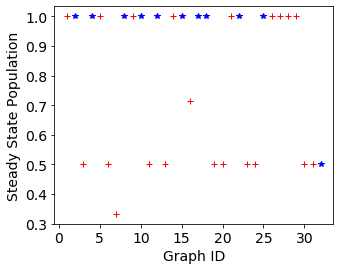

In [68]:
results_0 = results_df.loc[results_df['omega']==0]
font = 14
no_overlap = np.array([1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0])
marker = []
for over in no_overlap:
    if over != 0:
        marker.append('r+')
    else:
        marker.append('b*')
#marker[31]='r+' # What is going on Here?
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

IDs = results_0['ID'].values
pop = results_0['final_sink_pop'].values

x = np.argsort(IDs)
IDs = IDs[x]
pop = pop[x]

for i in range(len(marker)):
    ax.plot(IDs[i], pop[i], marker[i])
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)        
plt.ylabel('Steady State Population',fontsize=font)
plt.xlabel('Graph ID',fontsize=font)
#plt.savefig("Scaling.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
print('Figure 1 Steady State Sink Population, omega = 0')
plt.savefig("FMO_coherent_steady_state.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.show()

Figure 1 Steady State Sink Population, omega = 0


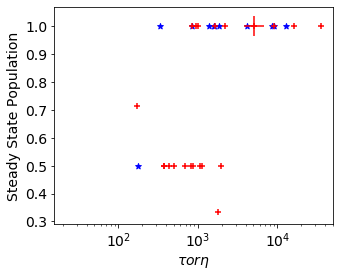

In [99]:
results_0 = results_df.loc[results_df['omega']==0]
font = 14
no_overlap = np.array([1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0])
marker = []
colors = []
for over in no_overlap:
    if over != 0:
        marker.append('+')
        colors.append('r')
    else:
        marker.append('*')
        colors.append('b')

marker[0]='+' # What is going on Here?
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

IDs = results_0['ID'].values
pop = results_0['final_sink_pop'].values
times = results_0['time'].values

x = np.argsort(IDs)
IDs = IDs[x]
pop = pop[x]
times = times[x]

for i in range(len(marker)):
    ax.scatter(times[i], pop[i], marker = marker[i], c=colors[i], label=i)

ax.scatter(times[0], pop[0], marker = marker[0], s=400, c=colors[0])
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)        
plt.ylabel('Steady State Population',fontsize=font)
plt.xlabel(r'$\tau' + str("or) + r'\eta$',fontsize=font)
#plt.savefig("Scaling.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
print('Figure 1 Steady State Sink Population, omega = 0')
ax.set_xscale('log')
plt.savefig("FMO_coherent_times.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.show()

In [121]:
IDs = results_0['ID'].values
pops = results_0['final_sink_pop'].values
times = results_0['time'].values
x = np.argsort(times)
IDs = IDs[x]
pops = pops[x]
times = times[x]

complete = []
for pop in pops:
    if pop < 0.999999999999:
        complete.append(False)
    else:
        complete.append(True)
IDs_f = []
pops_f = []
times_f = []
for i in range(len(IDs)):
    if complete[i]:
        IDs_f.append(IDs[i])
        pops_f.append(pops[i])
        times_f.append(times[i])
        
        
print(complete)

print(IDs_f.index(1))
print(len(IDs_f))
print(IDs_f)
print(pops_f)
print(times_f)

[False, False, True, False, False, False, False, False, False, True, True, False, True, True, False, False, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, False]
11
17
[12, 9, 2, 14, 21, 18, 15, 17, 27, 29, 8, 1, 22, 28, 10, 25, 5]
[0.9999999999999829, 0.999999999999973, 1.00000000000002, 1.00000000000001, 0.9999999999999591, 0.999999999999977, 0.999999999999662, 0.999999999999683, 0.9999999999995959, 0.999999999999997, 0.99999999999998, 1.00000000000002, 0.9999999999999929, 0.999999999999997, 0.999999999999972, 0.999999999999984, 0.9999999999999821]
[331.4208984375, 831.54296875, 836.0595703125, 934.2041015625, 1010.25390625, 1369.873046875, 1588.5009765625, 1615.3564453125, 1642.9443359375, 2204.05578613281, 4104.76684570313, 5022.27783203125, 8566.818237304691, 9159.08813476563, 9170.303344726559, 12782.135009765601, 16213.9892578125]


Figure 1 shows the steady state sink population for the graph set at $\omega = 0$. For a number of cases the equillibrium value is less than one. It has previously been demonstrated that this can occur if $\mathbf{H}$ has eigenstates which do not overlap with vertices connected to a sink. However, as shown, this property is correlative rather than deterministic. In the case of graph 32, a non-zero probability of network retension is observed for despite its $\mathbf{H}$ containing no non-overlapping eigenstates. Noteably, this is the circle graph, as shown in Figure 2, and the only circulant graph in the sample set. For the set of graphs with a steady state sink population less than 1, additional walks were carried out with $\Gamma = 0.1$ and $\Gamma = 0.01$. This decrease resulted in a larger equilibrium time but the steady state sink population remained unchanged in each case.

Figure 2 Graph 32


/home/edric/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-1.04707770498335, 1.1250577452646644, -1.1428939751728866, 1.124552043602214)

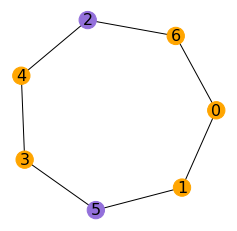

In [28]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/32.mtx')))
print("Figure 2 Graph 32")
color_map = ['orange', 'orange', 'mediumpurple', 'orange', 'orange', 'mediumpurple', 'orange']
nx.draw_networkx(graph_max, with_labels = True, node_color = color_map, font_size=16)
plt.axis('off')
#plt.savefig("Scaling.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)


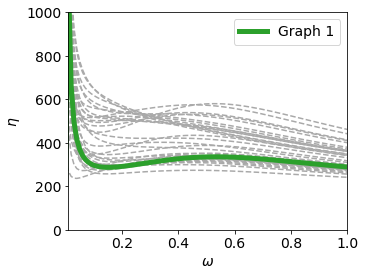

In [29]:
font = 14
files = np.arange(1,33,1) 
#files = [1, 12, 7, 27, 5, 29, 31, 9]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
h = 2000/float(16384)
ts = np.arange(0,2000 + h, h)

for file in files:
        ax.plot(results_df.loc[results_df['ID']==file]['omega'],results_df.loc[results_df['ID']==file]['time'], '--', c = 'darkgrey')
        
ax.plot(results_df.loc[results_df['ID']==file]['omega'],results_df.loc[results_df['ID']==file]['time'], label = 'Graph 1', c = color[0], linewidth=5.0)

#ax.set_scale('log')
#ax.set_yscale('log')
plt.legend(fontsize = font)
ax.set_ylim(0.0,1000)
ax.set_xlim(0.01,1)
#ax.axvline(x=0.47)
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)        
plt.xlabel(r'$\omega$',fontsize=font)
plt.ylabel(r'$\eta$',fontsize=font)
print()
plt.savefig("FMO_EST_all_graphs.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.show()


For $\omega >0$ $\eta$ is finite due to the scattering induced by the Linblad operators providing a transport mechanism indepedent of the inter-vertex coherence. Figure ?? provides an overview of $\eta$ as a function of $\omega$. A high degree of varience is observed for all $\omega$ and the ordering of $\eta$ is not constant for $\omega < \sim 0.6$. 

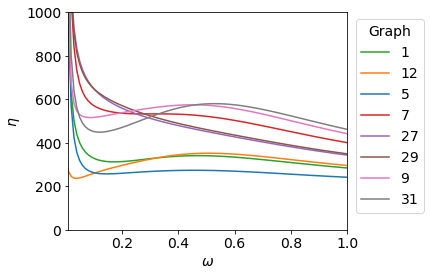

In [30]:
font = 14
#files = np.arange(1,33,1) 
files = [1, 12, 5, 7, 27, 29, 9, 31]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
h = 2000/float(16384)
ts = np.arange(0,2000 + h, h)
indx = 0
for file in files:
    ax.plot(results_df.loc[results_df['ID']==file]['omega'],results_df.loc[results_df['ID']==file]['time'], label=str(file), c=color[indx])
    indx += 1
#ax.set_scale('log')
#ax.set_yscale('log')
plt.legend(title = "Graph", fontsize = font, title_fontsize = font, loc = 'upper right', bbox_to_anchor=(1.3, 1.0))
ax.set_ylim(0.0,1000)
ax.set_xlim(0.01,1)
#ax.axvline(x=0.47)
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)        
plt.xlabel(r'$\omega$',fontsize=font)
plt.ylabel(r'$\eta$',fontsize=font)
print()
plt.savefig("FMO_EST_subset.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.show()

In [133]:
omegas = np.arange(0.0,1.01,0.01)

for omega in omegas:
    omega_results = results_df.loc[results_df['omega']==round(omega,2)]
    IDs = omega_results['ID'].values
    pops = omega_results['final_sink_pop'].values
    times = omega_results['time'].values
    x = np.argsort(times)
    IDs = IDs[x]
    pops = pops[x]
    times = times[x]
    result = np.where(IDs==1)
    print(omega, result[0][0], round(100*result[0][0]/len(IDs),2))


     


0.0 25 78.12
0.01 9 28.12
0.02 9 28.12
0.03 10 31.25
0.04 10 31.25
0.05 11 34.38
0.06 11 34.38
0.07 11 34.38
0.08 10 31.25
0.09 10 31.25
0.1 10 31.25
0.11 10 31.25
0.12 10 31.25
0.13 10 31.25
0.14 10 31.25
0.15 10 31.25
0.16 10 31.25
0.17 10 31.25
0.18 10 31.25
0.19 9 28.12
0.2 9 28.12
0.21 9 28.12
0.22 9 28.12
0.23 9 28.12
0.24 9 28.12
0.25 9 28.12
0.26 9 28.12
0.27 9 28.12
0.28 9 28.12
0.29 10 31.25
0.3 10 31.25
0.31 10 31.25
0.32 10 31.25
0.33 9 28.12
0.34 9 28.12
0.35000000000000003 9 28.12
0.36 9 28.12
0.37 9 28.12
0.38 9 28.12
0.39 9 28.12
0.4 9 28.12
0.41000000000000003 9 28.12
0.42 9 28.12
0.43 9 28.12
0.44 9 28.12
0.45 9 28.12
0.46 9 28.12
0.47000000000000003 10 31.25
0.48 10 31.25
0.49 10 31.25
0.5 10 31.25
0.51 10 31.25
0.52 10 31.25
0.53 10 31.25
0.54 10 31.25
0.55 10 31.25
0.56 10 31.25
0.5700000000000001 10 31.25
0.58 10 31.25
0.59 10 31.25
0.6 10 31.25
0.61 9 28.12
0.62 9 28.12
0.63 9 28.12
0.64 9 28.12
0.65 9 28.12
0.66 9 28.12
0.67 9 28.12
0.68 9 28.12
0.69000000000000

Figure ?? shows the same relationship for the set of graphs exhibiting either the lowest or highest $\eta$ at each $\omega$, along with the baseline FMO topology (graph 1). Two graphs emerge as providing the most effcient transport, graph 12 for $0 < \omega \leq 0.1$ and graph 5 for $0.1 < \omega \leq 1$, shown in Figure ?? (b) and (c). The difference in transport efficiency is most pronounced for the lower $\omega$ range, with graph 12 having an $\eta$ $\sim 73\%$ greater than graph 5 at $\omega = 0.01$. For the higher $\omega$ range the difference stablizes to $20 \pm 2 \%$. At the other extreme, the least efficient topology shows a greater degree of varience. Graph 7 has the highest $\eta$ for $ \omega = 0.01$, graph 27 for $ 0.01 < \omega \leq 0.1$, graph 29 for $0.1 < \omega \leq 0.24$, graph 9 for $ 0.24 < \omega \leq 0.46$ and graph 31 for $0.46 < \omega \leq 1$. The structure of these graphs is shown in Figures ?? (c) to (h). 

In general, $\tau(\omega)$ exibits three distinct slopes, coresponding to a lower, middel and upper $\omega$. Where present, the lower to middle transition is a local minimum and the middel to upper is a local maximum in $\tau(\omega)$. The frist phase chnage is present for all graphs and is consistently marks a transition to a slope is a smaller gradient. For graphs 27 and 29, only the first phase change is observed and there exists only a global minima at $\omega = 1$. In the case of graph 1 the sencond phase change occurs with a small local maximum, a quality that is also exhibited graph 5, whose $\tau(\omega)$ remains relatively constant for $0.1 < \omega \leq 1$. In Figure ?? the same pattern of behaviour is shared for the majority of graphs in the lower group of $\tau(\omega)$ values for the middle to upp $\omega$ range.

/home/edric/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


a Graph 12
b Graph 5
a Graph 7
b Graph 27
c Graph 29
d Graph 9
e Graph 3


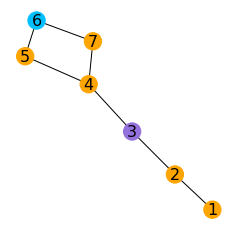

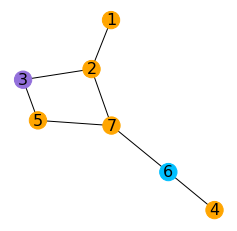

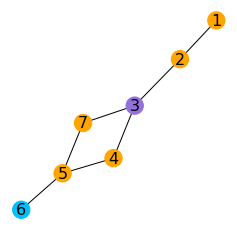

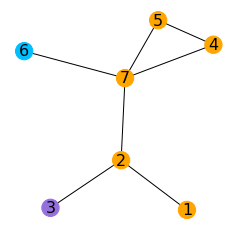

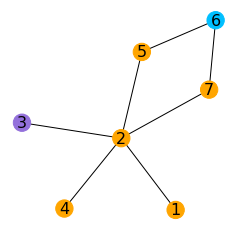

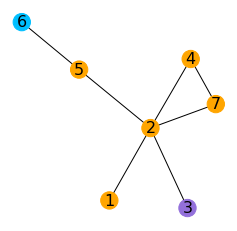

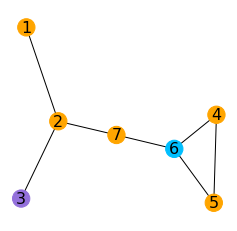

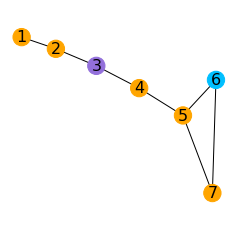

In [31]:
files = [ 1, 12, 5, 7, 27, 29, 9, 31]
letters = ["a", "b", "c", "d", "e", "f", "g", "h"]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/' + str(1) + '.mtx')))
color_map = ['orange', 'orange', 'mediumpurple', 'orange', 'orange', 'deepskyblue', 'orange']

labels = {}
indx = 1
for idx, node in enumerate(graph_max.nodes()):
    labels[node] = str(indx)
    indx += 1
    
nx.draw_networkx(graph_max, with_labels = True, node_color = color_map, font_size=16, labels = labels)
plt.axis('off')
plt.savefig(str(1) + "FMO_top.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)

files = [12, 5]
for file, letter in zip(files, letters):
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/' + str(file) + '.mtx')))
    print(str(letter) + " Graph " + str(file))
    color_map = ['orange', 'orange', 'mediumpurple', 'orange', 'orange', 'deepskyblue', 'orange']
    nx.draw_networkx(graph_max, with_labels = True, node_color = color_map, font_size=16, labels = labels)
    plt.axis('off')
    plt.savefig(str(file) + "_min.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
    
files = [7, 27, 29, 9, 3]
for file, letter in zip(files, letters):
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/' + str(file) + '.mtx')))
    print(str(letter) + " Graph " + str(file))
    color_map = ['orange', 'orange', 'mediumpurple', 'orange', 'orange', 'deepskyblue', 'orange']
    nx.draw_networkx(graph_max, with_labels = True, node_color = color_map, font_size=16, labels = labels)
    plt.axis('off')
    plt.savefig(str(file) + "_max.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)


Considering the entire set between $0.1 \geq \omega < \leq 1$, the global minima of $\tau(\omega)$ occurs with completely coherent transport, aside for graphs 2, 12, 31 and 32. The highest $\tau(\omega)$ occurs at $\omega = 0.01$ for all graphs aside from graph 12, which has a global maximum at $\omega = 0.5$.

a Graph 2
b Graph 12


/home/edric/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


c Graph 31
d Graph 32


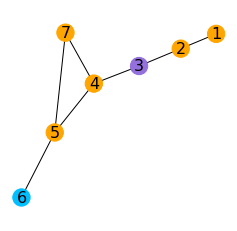

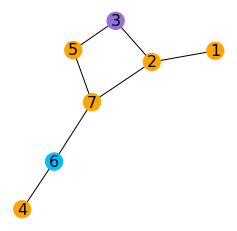

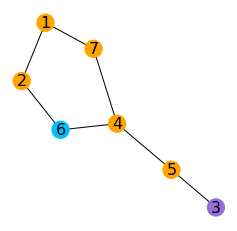

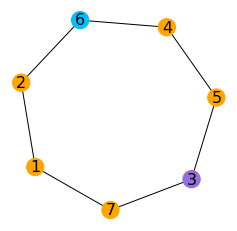

In [32]:
files = [2, 12, 31, 32]
for file, letter in zip(files, letters):
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/' + str(file) + '.mtx')))
    print(str(letter) + " Graph " + str(file))
    color_map = ['orange', 'orange', 'mediumpurple', 'orange', 'orange', 'deepskyblue', 'orange']
    nx.draw_networkx(graph_max, with_labels = True, node_color = color_map, font_size=16, labels = labels)
    plt.axis('off')
    plt.savefig(str(file) + "_coherent_global_min.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)

In [109]:
results_df_C = pd.read_csv('Application_1_All_Complete.csv',encoding = "ISO-8859-1")
IDs = np.arange(1,33,1)
for ID in IDs:
    omega_graph = results_df_C.loc[results_df_C['ID']==ID]
    min_time = np.min(omega_graph['time'].values) 
    min_omega = omega_graph.loc[omega_graph['time']==min_time]['omega'].values
    max_time = np.max(omega_graph['time'].values) 
    max_omega = omega_graph.loc[omega_graph['time']==max_time]['omega'].values
    print(ID, min_omega, max_omega, 100*(max_time-min_time)/max_time)

1 [1.] [0.01] 71.69421487603306
2 [0.06] [0.01] 41.23847167325428
3 [1.] [0.01] 70.10913268236645
4 [1.] [0.01] 66.77751385589865
5 [1.] [0.01] 75.9946627850558
6 [1.] [0.01] 58.81920627143557
7 [1.] [0.01] 77.30290456431536
8 [1.] [0.01] 57.084968975560336
9 [1.] [0.01] 56.86695278969957
10 [1.] [0.01] 75.83892617449665
11 [1.] [0.01] 82.869122491764
12 [0.04] [0.5  0.51] 32.85961871750433
13 [1.] [0.01] 66.4024024024024
14 [1.] [0.01] 77.82388663967612
15 [1.] [0.01] 56.19579880516477
16 [1.] [0.01] 74.07407407407408
17 [1.] [0.01] 60.323601829053814
18 [1.] [0.01] 49.37367052706216
19 [1.] [0.01] 77.37684823412242
20 [1.] [0.01] 78.33733013589129
21 [1.] [0.01] 63.49768123016842
22 [1.] [0.01] 65.17307046040104
23 [1.] [0.01] 76.82230177469724
24 [1.] [0.01] 71.8440122044241
25 [1.] [0.01] 67.09872804360994
26 [1.] [0.01] 75.38744672607517
27 [1.] [0.01] 79.97295566151875
28 [1.] [0.01] 78.42616482015481
29 [1.] [0.01] 78.63490404002688
30 [1.] [0.01] 81.10115629068076
31 [0.12] [0.

0.01 26 12 66.565 0.06038066245507884
0.02 26 12 55.778 0.0552136465653247
0.03 27 12 53.167 0.049468649198093205
0.04 27 12 51.56 0.04429090762942442
0.05 27 12 50.138 0.03987640013990789
0.06 27 12 48.759 0.03613940046425582
0.07 27 12 47.538 0.033007488687381306
0.08 27 18 46.433 0.030352374882715315
0.09 27 18 45.961 0.028370996799905825
0.1 27 18 45.448 0.02659656028473036
0.11 27 18 44.904 0.025002217519612253
0.12 27 18 44.332 0.02355963671687193
0.13 27 18 43.779 0.022256887967833486
0.14 27 15 43.548 0.02118156313282978
0.15 27 15 43.395 0.02021533490032505
0.16 27 15 43.195 0.01930363346266666
0.17 27 15 42.983 0.018444167198574522
0.18 27 15 42.732 0.017628926170139073
0.19 27 15 42.47 0.016858109047907292
0.2 27 15 42.179 0.016125851108218372
0.21 27 15 41.864 0.015427735735148553
0.22 27 15 41.556 0.014766311922891635
0.23 27 15 41.233 0.014137984366649526
0.24 27 15 40.901 0.013534325593039302
0.25 27 15 40.558 0.012958778356891309
0.26 27 15 40.258 0.012414099619398811
0

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


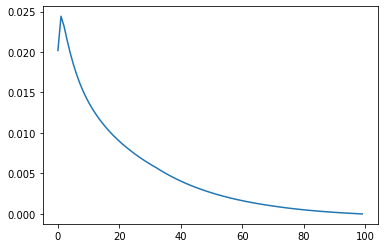

In [34]:
omegas = np.arange(0.01,1.01,0.01)
max_norm_cohs = []
min_norm_cohs = []
for omega in omegas:
    omega_results = results_df.loc[results_df['omega']==round(omega,2)]
    cohs = omega_results['integrated_coherences']
    times = omega_results['time']
    norm_cohs = np.divide(cohs,times)
    min_norm_coh = np.min(norm_cohs)
    max_norm_coh = np.max(norm_cohs)
    max_norm_cohs.append(max_norm_coh)
    min_norm_cohs.append(min_norm_coh)
    print(round(omega,2), omega_results.loc[norm_cohs.idxmin()]['ID'], omega_results.loc[norm_cohs.idxmax()]['ID'], round(100*(max_norm_coh - min_norm_coh)/max_norm_coh,3), max_norm_coh)
plt.plot(min_norm_cohs)

In [35]:
omegas = np.arange(0.01,1.01,0.01)

for omega in omegas: 
    omega_results = results_df.loc[results_df['omega']==round(omega,2)]
    time_5 = omega_results.loc[omega_results['ID']==5]['time'].values
    time_12 = omega_results.loc[omega_results['ID']==12]['time'].values
    min_time = np.min(omega_results['time'])
    max_time = np.max(omega_results['time'])
    min_ID = omega_results[omega_results['time']==min_time]['ID'].values
    max_ID = omega_results[omega_results['time']==max_time]['ID'].values
    print(round(omega,2), min_ID, max_ID, round(100*(max_time-min_time)/max_time,2), max_time, min_time, 100*(time_5 - min_time)/time_5,100*(time_12 - min_time)/time_12)

0.01 [12] [7] 84.65 1765.13671875 270.8740234375 [73.08345463] [0.]
0.02 [12] [27] 78.06 1119.62890625 245.60546875 [56.98097071] [0.]
0.03 [12] [27] 74.45 929.19921875 237.4267578125 [44.18938307] [0.]
0.04 [12] [27] 71.68 834.8388671875 236.4501953125 [33.73246664] [0.]
0.05 [12] [27] 69.3 777.34375 238.6474609375 [25.21040551] [0.]
0.06 [12] [27] 67.15 737.548828125 242.3095703125 [18.27912721] [0.]
0.07 [12] [27] 65.18 707.8857421875 246.4599609375 [12.71076524] [0.]
0.08 [12] [27] 63.36 684.5703125 250.8544921875 [8.13589629] [0.]
0.09 [12] [27] 61.63 665.52734375 255.37109375 [4.34385002] [0.]
0.1 [12] [27] 60.01 649.5361328125 259.765625 [1.20705664] [0.]
0.11 [5] [29] 59.2 637.8173828125 260.25390625 [0.] [1.38760407]
0.12 [5] [29] 58.79 627.685546875 258.6669921875 [0.] [3.46241458]
0.13 [5] [29] 58.35 618.7744140625 257.6904296875 [0.] [5.20880108]
0.14 [5] [29] 57.85 610.4736328125 257.32421875 [0.] [6.64304694]
0.15 [5] [29] 57.35 603.02734375 257.2021484375 [0.] [7.9108391

Figure 2 Graph 5


/home/edric/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-0.49192405232620673,
 0.4374242070594153,
 -0.8154419222126303,
 1.1281744455829066)

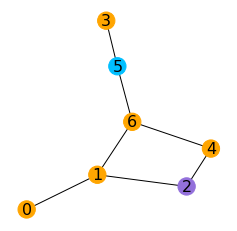

In [36]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/12.mtx')))
print("Figure 2 Graph 5")
color_map = ['orange', 'orange', 'mediumpurple', 'orange', 'orange', 'deepskyblue', 'orange']
nx.draw_networkx(graph_max, with_labels = True, node_color = color_map, font_size=16)
plt.axis('off')
#plt.savefig("Scaling.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)

Shows the differnce between the average $\bar{\kappa}(\omega)$ and $\kappa(\omega)$ for graphs in subsets A and B. At $\omega < 0.03$ the behaviour is quite variable graphs t2 and 5 shown a maximum at $\omega = $ and $\omega$. For higher omega the rate of change occurs exponentially, but at a non-uniform rate accorss the set of graphs. 

How does the coherence correlate with speed?       

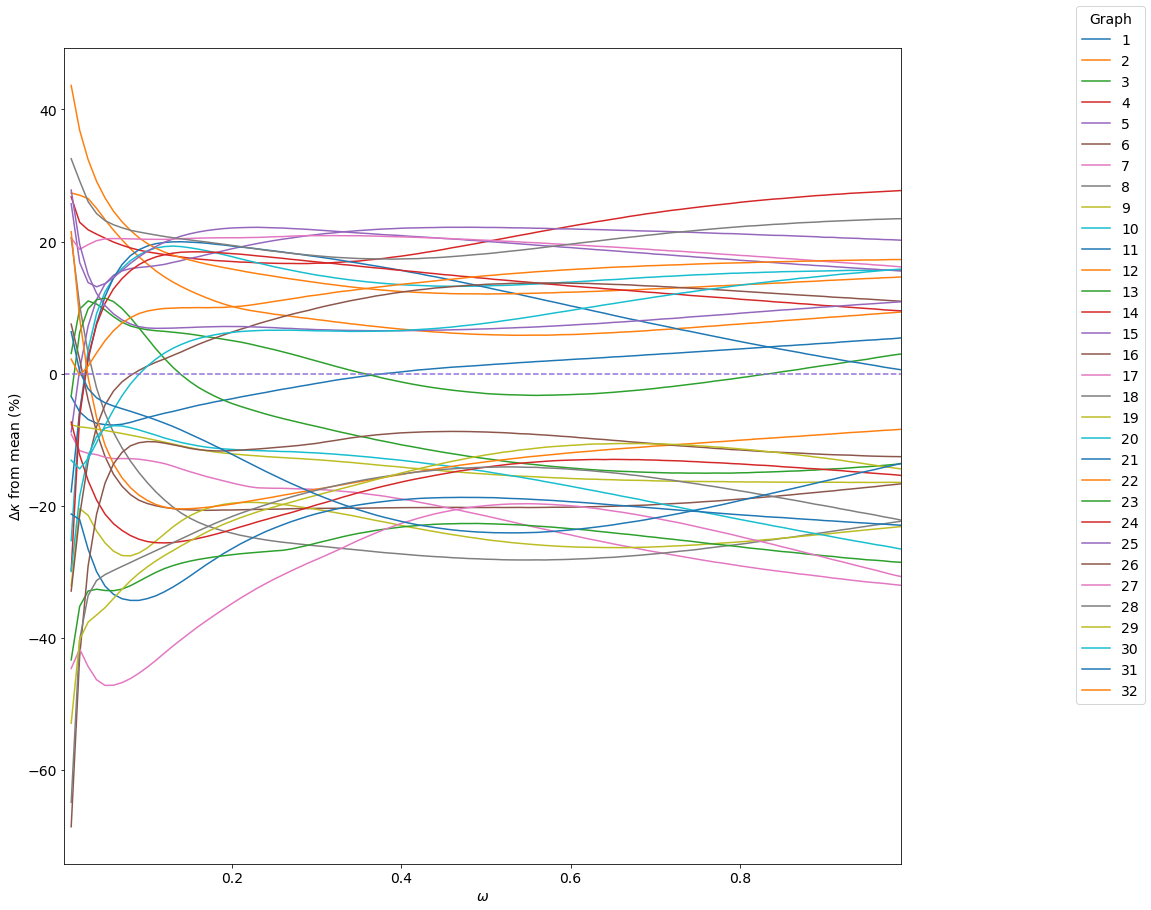

In [161]:
font = 14
files = np.arange(1,33,1) 
#files = [1, 12, 5, 7, 27, 29, 9, 31, 32,2]
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
h = 2000/float(16384)
ts = np.arange(0,2000 + h, h)

omegas = np.arange(0.01,1.01,0.01)
mean_norm_coh = []
for omega in omegas:
    cohs = results_df_C.loc[results_df_C['omega']==round(omega, 2)]['integrated_coherences']
    times = results_df_C.loc[results_df_C['omega']==round(omega, 2)]['time']
    norm_cohs = np.divide(cohs, times)
    mean_norm_coh.append(np.mean(norm_cohs))
    
mean_norm_coh = np.array(mean_norm_coh)
    
#ax.plot(omegas[0:80],mean_norm_coh[0:80], label = "yes")
indx = 0
for file in files:
    coh = results_df_C.loc[results_df_C['ID']==file]['integrated_coherences']
    time = results_df_C.loc[results_df_C['ID']==file]['time']
    time_norm = np.divide(coh, time)
    #print(time_norm)time_norm[0:60]-mean_norm_coh[0:60]
    ax.plot(results_df_C.loc[results_df_C['ID']==file]['omega'][0:],100*((time_norm[0:]-mean_norm_coh[0:])/time_norm[0:]), label = str(file))
    indx += 1
ax.axhline(y=0, color = 'mediumpurple', linestyle = '--')

#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.axvline(x=0.15)
#ax.set_ylim(10**(-2),20**(-1))
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)        
plt.ylabel(r'$\Delta \kappa$ from mean (%)',fontsize=font)
plt.xlabel(r'$\omega$',fontsize=font)
ax.set_xlim(0.001,0.99)
plt.legend(title = "Graph", fontsize = font, title_fontsize = font, loc = 'upper right', bbox_to_anchor=(1.3, 1.06))
plt.savefig("Delta_Cohs.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.show()

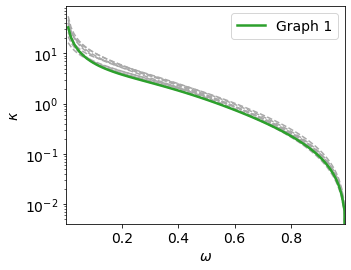

In [38]:
font = 14
files = np.arange(1,33,1) 
files = [1, 12, 5, 7, 27, 29, 9, 31, 32,2]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
h = 2000/float(16384)
ts = np.arange(0,2000 + h, h)

#ax.plot(omegas[0:80],mean_norm_coh[0:80], label = "yes")
indx = 0
for file in files:
    ax.plot(results_df_C.loc[results_df_C['ID']==file]['omega'], results_df_C.loc[results_df_C['ID']==file]['integrated_coherences'], '--',c='darkgray')
    indx += 1
ax.plot(results_df_C.loc[results_df_C['ID']==1]['omega'], results_df_C.loc[results_df_C['ID']==1]['integrated_coherences'], c=color[0],linewidth=2.5, label = 'Graph 1')

#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.axvline(x=0.15)
#ax.set_ylim(10**(-2),20**(-1))
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)        
plt.ylabel(r'$\kappa$',fontsize=font)
plt.xlabel(r'$\omega$',fontsize=font)
ax.set_xlim(0.001,0.99)
ax.set_yscale('log')
plt.legend(fontsize = font, title_fontsize = font)
plt.savefig("kappa_omega.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.show()

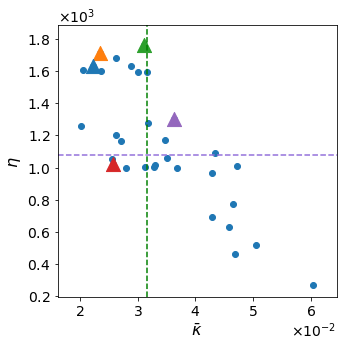

In [170]:
font = 14
all_files = np.arange(1,33,1) 
files = [1, 12, 5, 7, 27, 29, 9, 31, 32,2]
files = [7,27,29,9,31]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
h = 2000/float(16384)
ts = np.arange(0,2000 + h, h)

omega = 0.01
omega_df = results_df_C.loc[results_df_C['omega'] == round(omega,2)]
ave_norm = np.median(np.divide(omega_df['integrated_coherences'].values, omega_df['time']))
ave_time = np.median(omega_df['time'])
coh_norm = np.divide(omega_df['integrated_coherences'].values, omega_df['time'])

ax.scatter(coh_norm, omega_df['time'], marker = 'o')
ax.axvline(x=ave_norm, color = 'g', label = r'median $\bar{\kappa}$', linestyle ='--')
ax.axhline(y=ave_time, color = 'mediumpurple', label = r'median $\eta$', linestyle='--')
indx = 0
for file in files:
    coh_norm_fi = np.divide(omega_df.loc[omega_df['ID'] == file]['integrated_coherences'].values, omega_df.loc[omega_df['ID']==file]['time'])
    if file == 1:
        ax.scatter(coh_norm_fi, omega_df.loc[omega_df['ID'] == file]['time'], label = file, marker = '*', s= 400, c=color[indx])
    else:
        ax.scatter(coh_norm_fi, omega_df.loc[omega_df['ID'] == file]['time'], label = file, marker = '^', s= 200,  c=color[indx])
    indx += 1

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText = True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)
ax.yaxis.get_offset_text().set_fontsize(font)
ax.xaxis.get_offset_text().set_fontsize(font)
plt.yticks(fontsize = font)
plt.xticks(fontsize = font)
delta = (np.max(coh_norm) - np.min(coh_norm))*0.1
plt.xlim(np.min(coh_norm) - delta, np.max(coh_norm) + delta)
plt.ylabel(r'$\eta$', fontsize = font + 2)
plt.xlabel(r'$\bar{\kappa}$', fontsize = font + 2)
ax.tick_params(axis='x', which='minor', bottom=False)
#plt.legend(fontsize = font, loc = 'upper right', bbox_to_anchor=(1.5, 1.0))
plt.savefig("kappa_vs_eta_01.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.show()

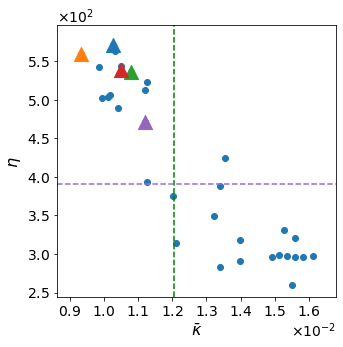

In [168]:
font = 14
all_files = np.arange(1,33,1) 
files = [1, 12, 5, 7, 27, 29, 9, 31, 32,2]
files = [7,27,29,9,31]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
h = 2000/float(16384)
ts = np.arange(0,2000 + h, h)

omega = 0.2
omega_df = results_df_C.loc[results_df_C['omega'] == round(omega,2)]
ave_norm = np.median(np.divide(omega_df['integrated_coherences'].values, omega_df['time']))
ave_time = np.median(omega_df['time'])
coh_norm = np.divide(omega_df['integrated_coherences'].values, omega_df['time'])

ax.scatter(coh_norm, omega_df['time'], marker = 'o')
ax.axvline(x=ave_norm, color = 'g', label = r'median $\bar{\kappa}$', linestyle ='--')
ax.axhline(y=ave_time, color = 'mediumpurple', label = r'median $\eta$', linestyle='--')
indx = 0
for file in files:
    coh_norm_fi = np.divide(omega_df.loc[omega_df['ID'] == file]['integrated_coherences'].values, omega_df.loc[omega_df['ID']==file]['time'])
    if file == 1:
        ax.scatter(coh_norm_fi, omega_df.loc[omega_df['ID'] == file]['time'], label = file, marker = '*', s= 400, c=color[indx])
    else:
        ax.scatter(coh_norm_fi, omega_df.loc[omega_df['ID'] == file]['time'], label = file, marker = '^', s= 200,  c=color[indx])
    indx += 1

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText = True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)
ax.yaxis.get_offset_text().set_fontsize(font)
ax.xaxis.get_offset_text().set_fontsize(font)
plt.xticks(fontsize = font)
plt.yticks(fontsize = font)
delta = (np.max(coh_norm) - np.min(coh_norm))*0.1
plt.xlim(np.min(coh_norm) - delta, np.max(coh_norm) + delta)
plt.ylabel(r'$\eta$', fontsize = font + 2)
plt.xlabel(r'$\bar{\kappa}$', fontsize = font + 2)
ax.tick_params(axis='x', which='minor', bottom=False)
#plt.legend(fontsize = font, loc = 'upper right', bbox_to_anchor=(1.5, 1.0))
plt.savefig("kappa_vs_eta_02.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.show()

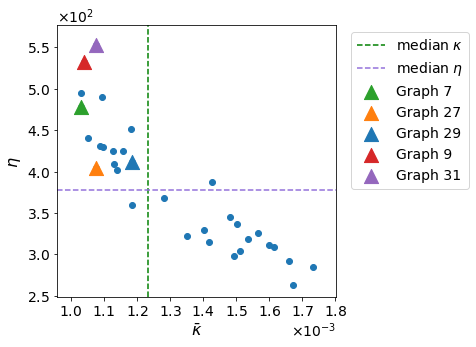

In [169]:
font = 14
all_files = np.arange(1,33,1) 
files = [1, 12, 5, 7, 27, 29, 9, 31, 32,2]
files = [7,27,29,9,31]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
h = 2000/float(16384)
ts = np.arange(0,2000 + h, h)

omega = 0.7
omega_df = results_df_C.loc[results_df_C['omega'] == round(omega,2)]
ave_norm = np.median(np.divide(omega_df['integrated_coherences'].values, omega_df['time']))
ave_time = np.median(omega_df['time'])
coh_norm = np.divide(omega_df['integrated_coherences'].values, omega_df['time'])

ax.scatter(coh_norm, omega_df['time'], marker = 'o')
ax.axvline(x=ave_norm, color = 'g', label = r'median $\kappa$', linestyle ='--')
ax.axhline(y=ave_time, color = 'mediumpurple', label = r'median $\eta$', linestyle='--')
indx = 0
for file in files:
    coh_norm_fi = np.divide(omega_df.loc[omega_df['ID'] == file]['integrated_coherences'].values, omega_df.loc[omega_df['ID']==file]['time'])
    if file == 1:
        ax.scatter(coh_norm_fi, omega_df.loc[omega_df['ID'] == file]['time'], label = 'Graph ' + str(file), marker = '*', s= 400, c=color[indx])
    else:
        ax.scatter(coh_norm_fi, omega_df.loc[omega_df['ID'] == file]['time'], label = 'Graph ' + str(file), marker = '^', s= 200,  c=color[indx])
    indx += 1

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText = True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)
ax.yaxis.get_offset_text().set_fontsize(font)
ax.xaxis.get_offset_text().set_fontsize(font)
plt.xticks(fontsize = font)
plt.yticks(fontsize = font)
delta = (np.max(coh_norm) - np.min(coh_norm))*0.1
plt.xlim(np.min(coh_norm) - delta, np.max(coh_norm) + delta)
plt.ylabel(r'$\eta$', fontsize = font + 2)
plt.xlabel(r'$\bar{\kappa}$', fontsize = font + 2)
ax.tick_params(axis='x', which='minor', bottom=False)
plt.legend(fontsize = font, loc = 'upper right', bbox_to_anchor=(1.5, 1.0))
plt.savefig("kappa_vs_eta_07.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.show()

In [42]:
len(color)

10